In [1]:
import numpy as np
import pandas as pd
import torch
import torch_geometric as pyg
import networkx as nx
from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx
from torch_geometric.data import DataLoader
import matplotlib.pyplot as plt

/home/diego/miniconda3/envs/ter_gnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
train_ds = ZINC(root='./data/zinc/', subset=True, split='train')

Total number of graphs in the dataset:

In [4]:
print(f'Number of graphs: {len(train_ds)}')

Number of graphs: 10000


In [5]:
import seaborn as sns

In [6]:
sns.set_context('talk')

In [7]:
def plot_graph(graph):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    nx_graph = to_networkx(graph, to_undirected=True)
    colors = graph.x.flatten().tolist()
    nx.draw_networkx(nx_graph, node_color=colors, cmap='Set1', ax=ax)
    ax.set_title('Target: {:.4f}'.format(graph.y.item()))

In [8]:
# high dpi
%config InlineBackend.figure_format = 'retina'

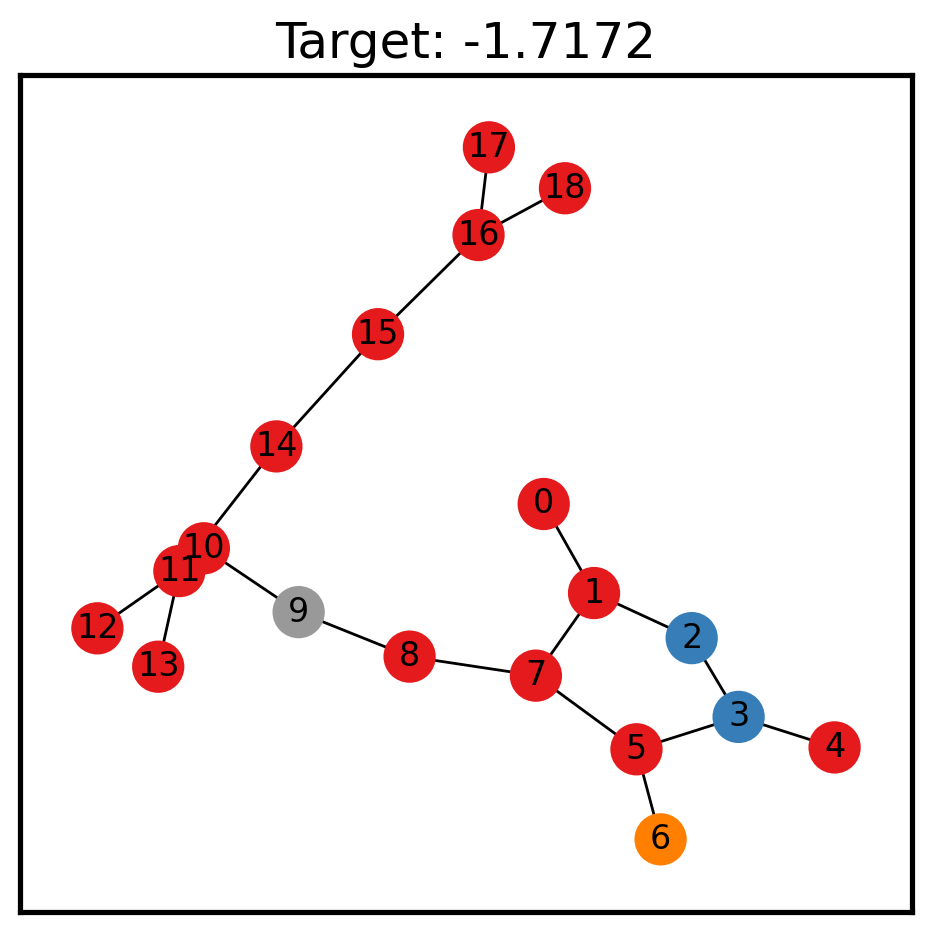

In [9]:
plot_graph(train_ds[6])
plt.tight_layout()

In [10]:
targets = np.array([graph.y.item() for graph in train_ds])

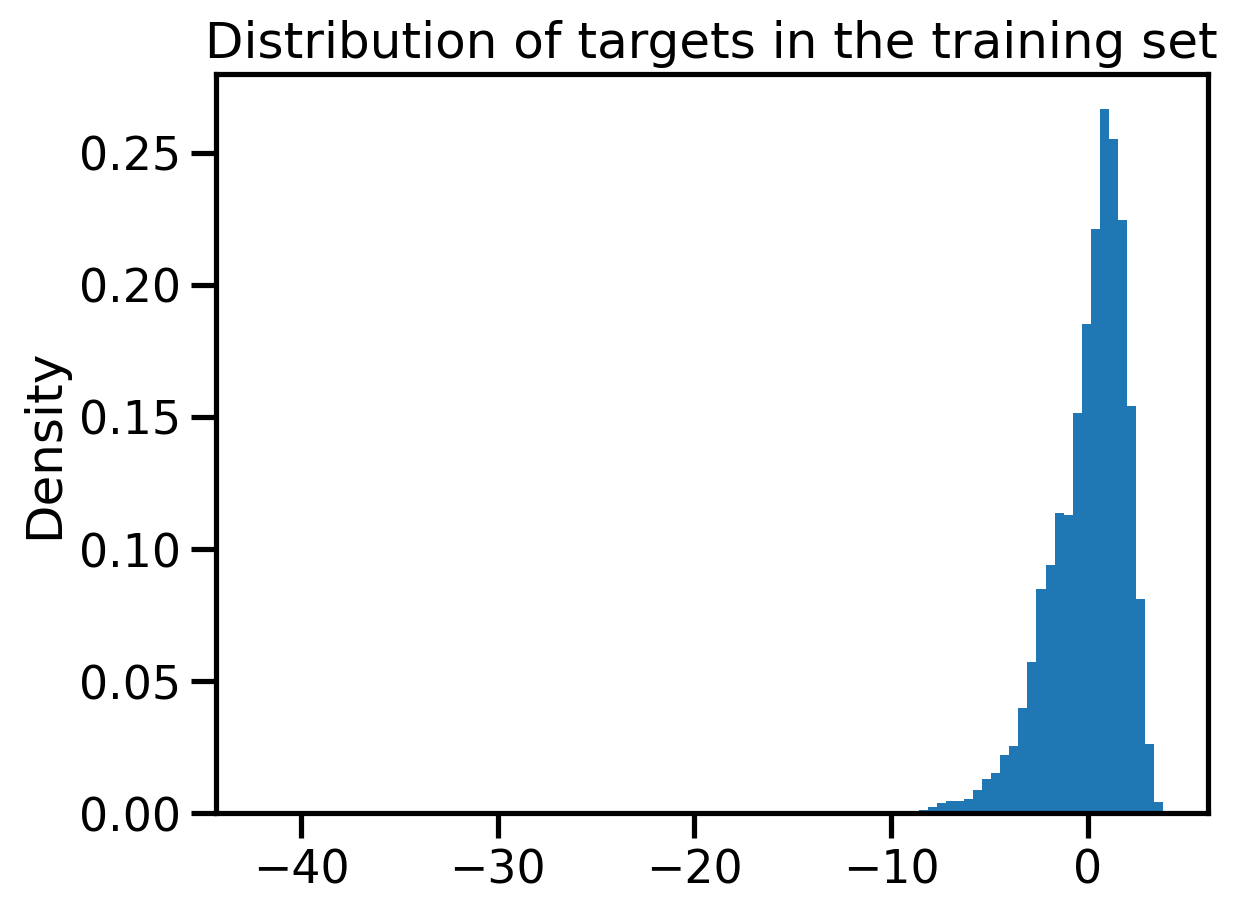

In [11]:
plt.hist(targets, bins=100, density=True);
plt.ylabel('Density');
plt.title('Distribution of targets in the training set');

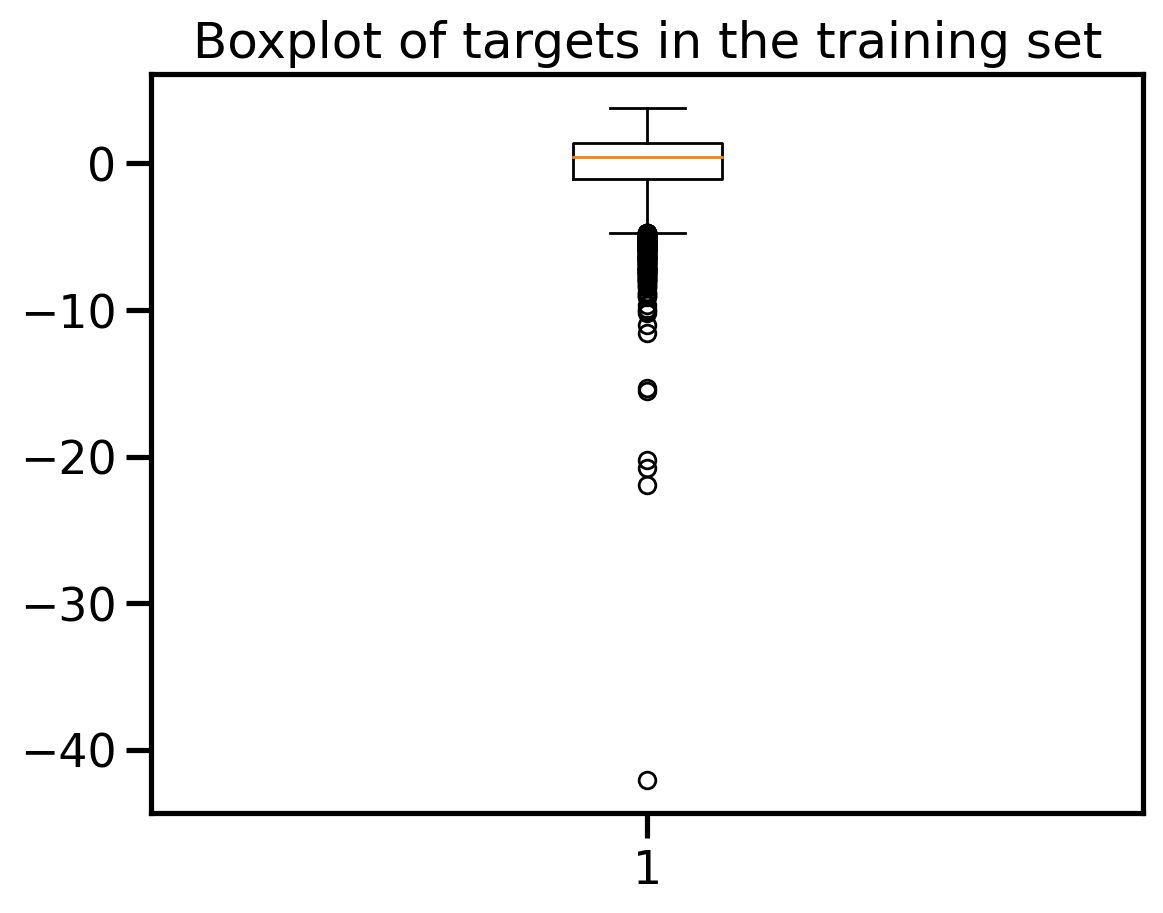

In [12]:
plt.boxplot(targets);
plt.title('Boxplot of targets in the training set');

In [13]:
nodes = np.array([graph.x.shape[0] for graph in train_ds])

In [14]:
nodes.mean(), nodes.std()

(23.1664, 4.489266202844291)

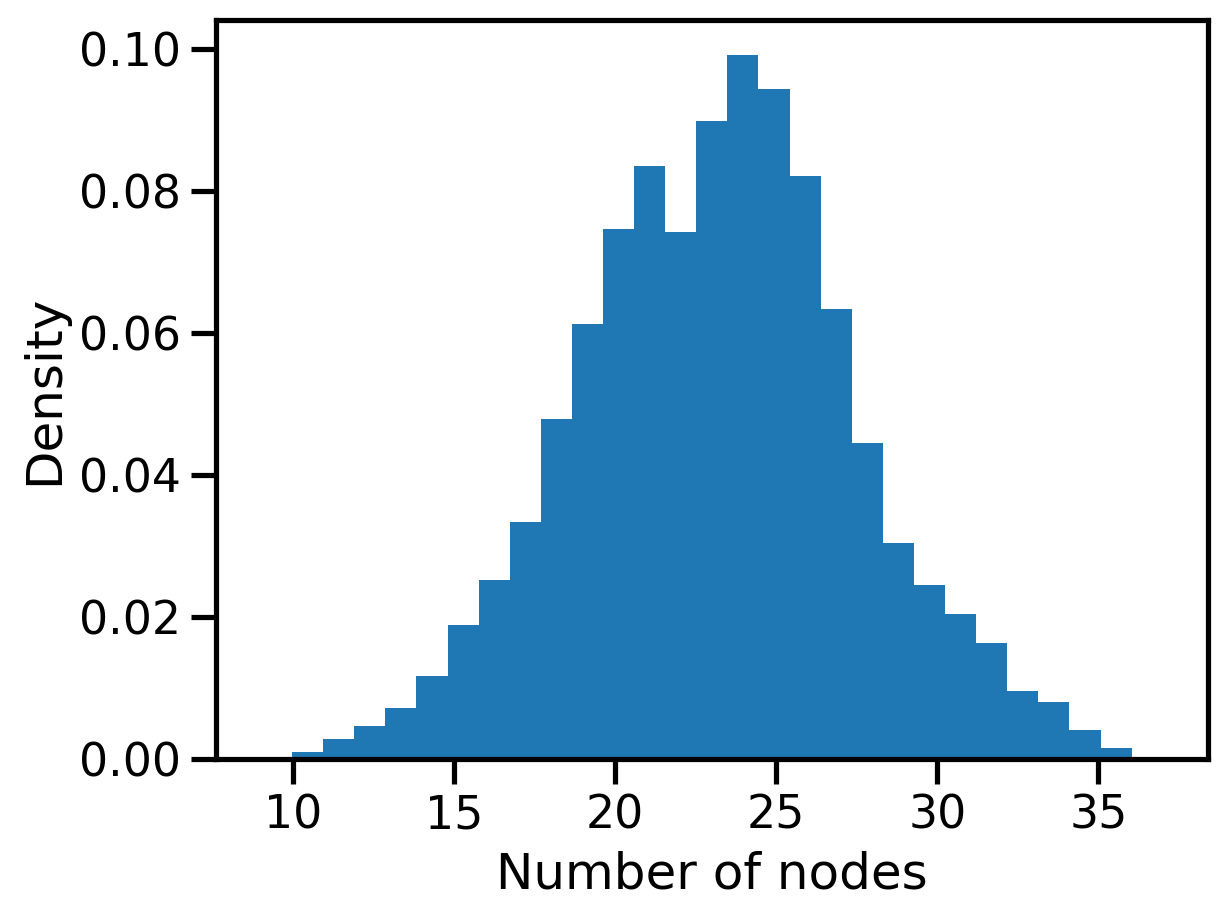

In [15]:
plt.hist(nodes, bins=29, density=True);
plt.ylabel('Density');
plt.xlabel('Number of nodes');

In [16]:
pd.Series(nodes).agg(['min', 'median', 'max'])

min        9.0
median    23.0
max       37.0
dtype: float64

In [17]:
atoms = pd.Series([graph.x.flatten().tolist() for graph in train_ds])

In [18]:
atom_counts = atoms.apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int)

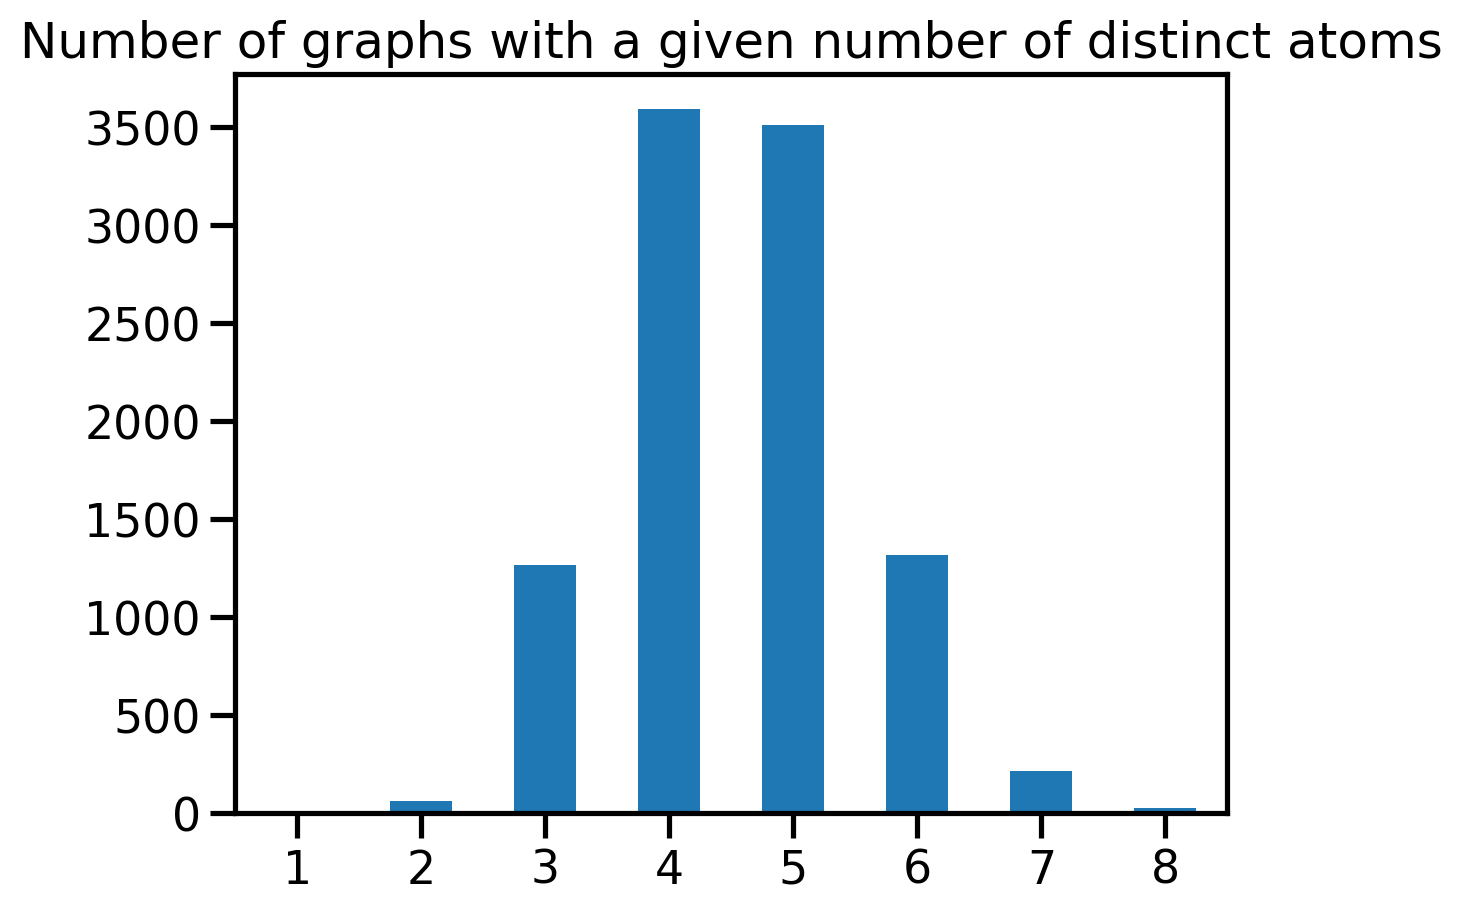

In [19]:
(atom_counts>0).sum(axis=1).value_counts().sort_index().plot.bar()
plt.xticks(rotation=0);
plt.title('Number of graphs with a given number of distinct atoms');

In [20]:
atom_counts.sum(axis=0)/atom_counts.sum()

0     1.0
1     1.0
2     1.0
5     1.0
8     1.0
6     1.0
7     1.0
3     1.0
4     1.0
11    1.0
12    1.0
9     1.0
10    1.0
13    1.0
15    1.0
20    1.0
14    1.0
18    1.0
16    1.0
19    1.0
17    1.0
dtype: float64

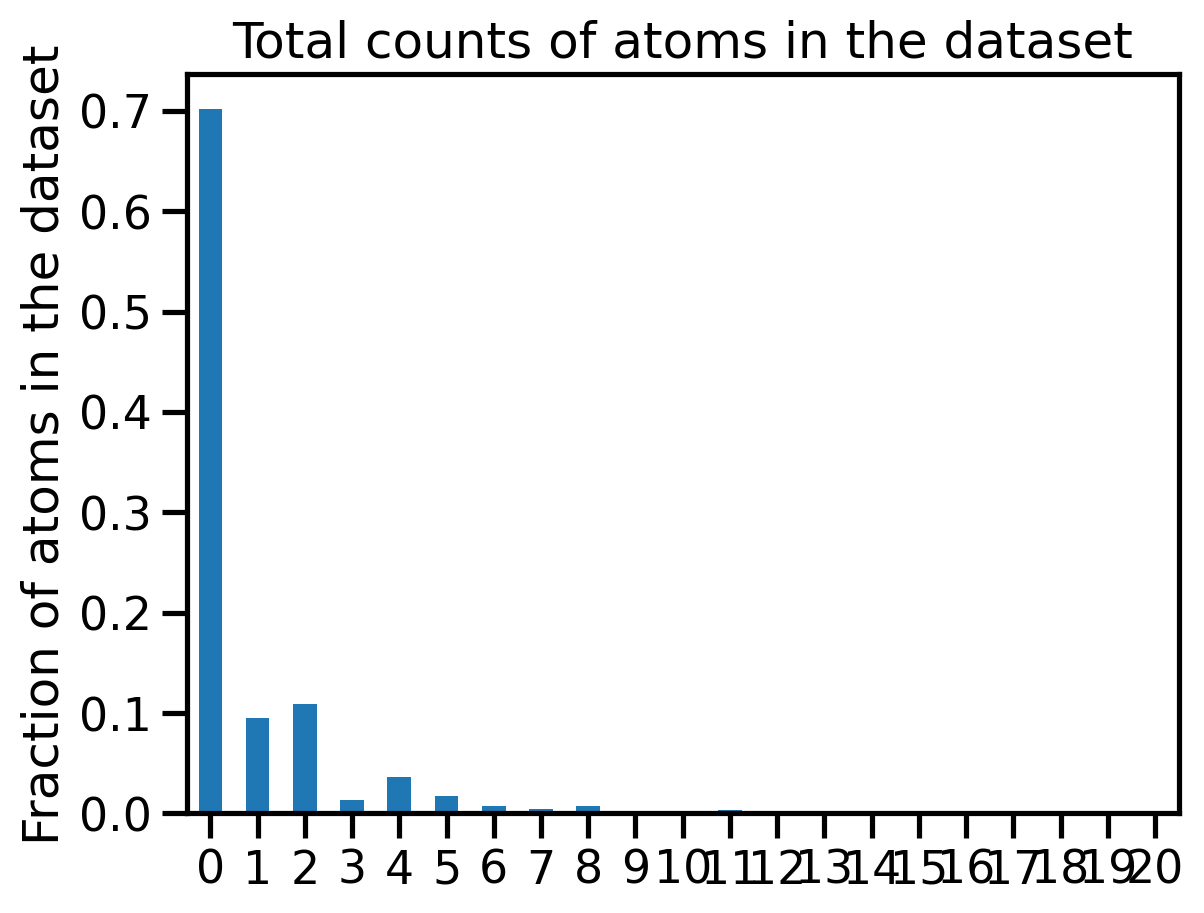

In [21]:
(atom_counts.sum(axis=0)/atom_counts.sum().sum()).sort_index().plot.bar()
plt.xticks(rotation=0);
plt.ylabel('Fraction of atoms in the dataset');
plt.title('Total counts of atoms in the dataset');

In [22]:
edges = np.array([graph.edge_index.shape[1] for graph in train_ds])

In [23]:
edges.mean()

49.8558

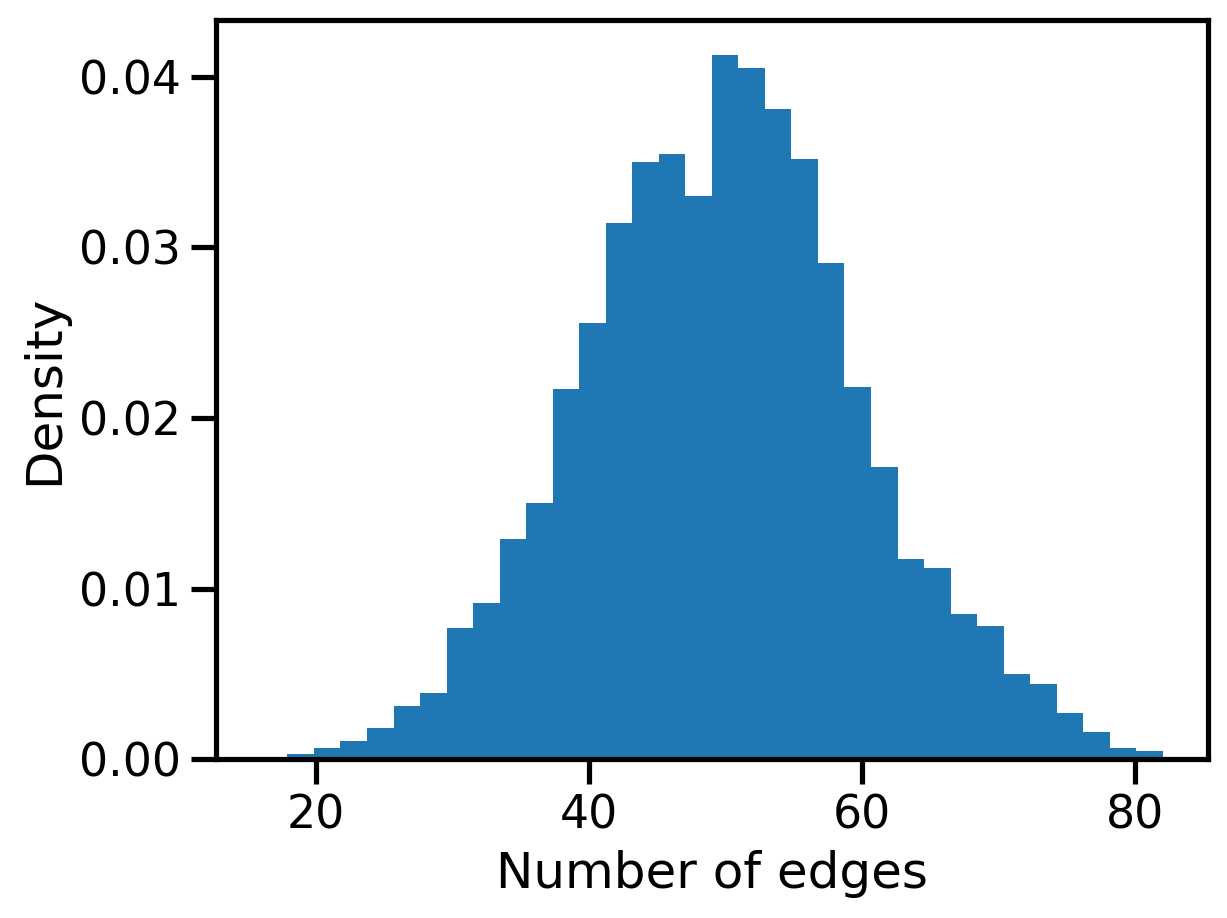

In [24]:
plt.hist(edges, bins=34, density=True);
plt.ylabel('Density')
plt.xlabel('Number of edges');

In [25]:
pd.Series(edges).agg(['min', 'median', 'max'])

min       16.0
median    50.0
max       82.0
dtype: float64

In [26]:
edges = pd.Series([graph.edge_attr.flatten().tolist() for graph in train_ds])

In [27]:
edge_counts = edges.apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int)

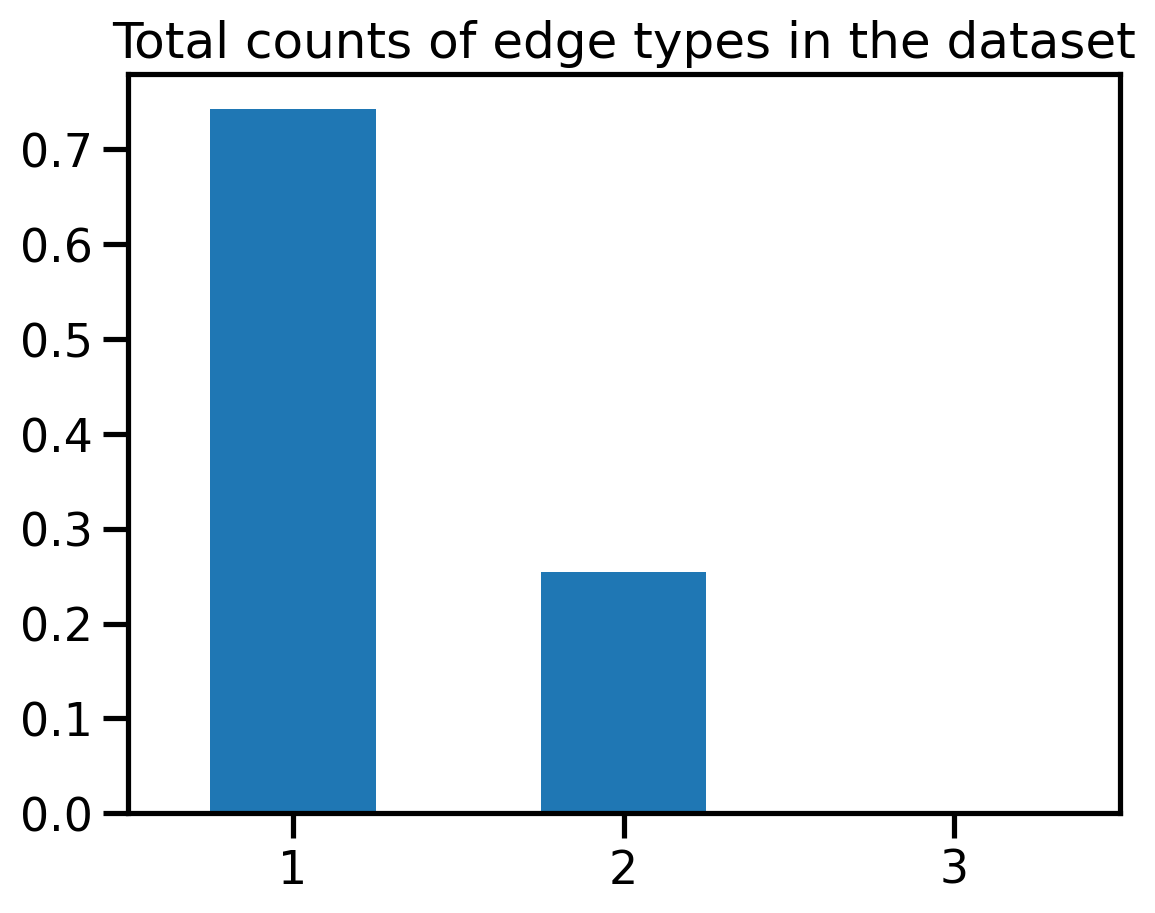

In [28]:
(edge_counts.sum(axis=0)/edge_counts.sum().sum()).plot.bar()
plt.xticks(rotation=0);
plt.title('Total counts of edge types in the dataset');

In [29]:
(edge_counts.sum(axis=0)/edge_counts.sum().sum())

1    0.742381
2    0.254927
3    0.002692
dtype: float64